In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.stats as ss
import sklearn.metrics as sm


In [ ]:
N = 100
w_true = 5
b_true = 2
noise_scale = .1
x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N, 1))
# Convert shape of y_np to (N,)
y_np = np.reshape(w_true * x_np  + b_true + noise, (-1))
print(y_np.shape) 
print(x_np.shape) 


In [ ]:
plt.scatter(x_np, y_np, color='green')
#plt.axis([0, 6, 0, 20])
plt.show()

In [ ]:
with tf.name_scope("placeholders"):
  x = tf.placeholder(tf.float32, (N, 1))
  y = tf.placeholder(tf.float32, (N,))
with tf.name_scope("weights"):
  W = tf.Variable(tf.random_normal((1, 1)))
  b = tf.Variable(tf.random_normal((1, 1)))
with tf.name_scope("prediction"):
  y_pred = tf.matmul(x, W) + b
with tf.name_scope("loss"):
  l = tf.reduce_sum((y - y_pred)**2)
with tf.name_scope("optim"):
  train_op = tf.train.AdamOptimizer(.001).minimize(l)

with tf.name_scope("summaries"):
  loss_scalar=tf.summary.scalar("loss", l)
  merged = tf.summary.merge([loss_scalar])
  #merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter("lr-train", tf.get_default_graph())

The merged is causing one of the biggest blunder in the code while training
So try using the merged fuction, it accepts the list as the input and [] is the way to define the list

In [ ]:
n_steps = 8000
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # Train model
  feed_dict = {x: x_np, y: y_np}
  y_pred_np = sess.run(y_pred, feed_dict=feed_dict)
  print(y_pred_np)
  for i in range(n_steps):
    feed_dict = {x: x_np, y: y_np}
    a3=sess.run(merged, feed_dict=feed_dict)
    a2,loss = sess.run([train_op,l], feed_dict=feed_dict)
    print("step %d, loss: %f" % (i, loss))
    train_writer.add_summary(a3, i)
  y_pred_np = sess.run(y_pred, feed_dict=feed_dict)
  print(y_pred_np)

In [ ]:
def pearson_r2_score(y, y_pred):
  """Computes Pearson R^2 (square of Pearson correlation)."""
  return ss.pearsonr(y, y_pred)[0]**2

def rms_score(y_true, y_pred):
  """Computes RMS error."""
  return np.sqrt(sm.mean_squared_error(y_true, y_pred))

In [ ]:
y_pred_np = np.reshape(y_pred_np, -1)
r2 = pearson_r2_score(y_np, y_pred_np)
print("Pearson R^2: %f" % r2)

In [ ]:
rms = rms_score(y_np, y_pred_np)
print("RMS: %f" % rms)

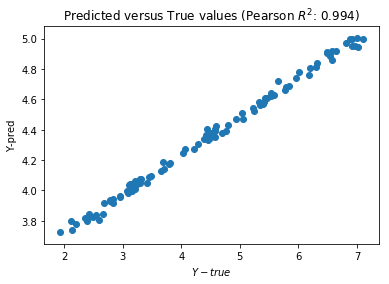

In [160]:
plt.xlabel("$Y-true$")
plt.ylabel("Y-pred")
plt.title("Predicted versus True values "
          r"(Pearson $R^2$: $0.994$)")
plt.scatter(y_np, y_pred_np)
plt.savefig("lr_pred.png")

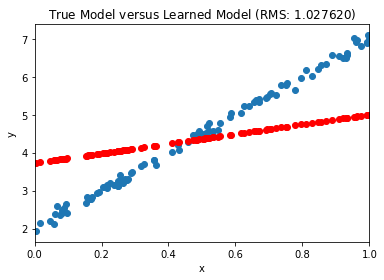

In [157]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("True Model versus Learned Model "
          r"(RMS: $1.027620$)")
plt.xlim(0, 1)
plt.scatter(x_np, y_np)
plt.scatter(x_np,y_pred_np,color="red")